# Modelo de Estudo em Data Science

Como expliquei em artigos anteriores, a necessidade de trocar de carreira me levou a estudos dessa área fascinante de <i>Data Science</i>. No entanto ficava a dúvida por onde começar. A Internet, este vasto mundo de informações, há vários tutorias, artigos, vídeos e cursos sobre o assunto, porém a luz veio conversando com pessoas que já atuam na área. Uma delas me passou a informação de que o melhor jeito de aprender é formar um currículo com estudos de casos, ou seja, um portfólio de projetos.

Nesse primeiro artigo de uma série que farei, pretendo abordar um estudo considerado um dos mais simples disponível. Mesmo recebendo esta consideração, ele é um estudo interessante para se aprender o básico de manipulação de dados, programação Python e apresentação de resultados.

Existe na Internet alguns repositórios de dados abertos ao público, um deles é o site <a href="https://research.google/tools/datasets/">Google Research Datasets</a>, onde encontramos muita informação atualizada, inclusive sobre a maior preocupação do momento, o <a href="https://research.google/tools/datasets/google-cluster-workload-traces-2019/">COVID-19</a>. Até o momento da escrita deste artigo já estava com <b>2,4 TB</b> de informações. Em seguida temos o site <a href="https://www.kaggle.com">Kaggle</a>. Neste podemos encontrar diversas bases de dados, onde são lançados desafios e competições, algumas delas com prêmios em dinheiro, e é também nele onde encontraremos o desafio mais simples que iremos resolver.

## Predição de Sobreviventes do Naufrágio do Titanic
<a href="https://www.kaggle.com/c/titanic"><img src="Titanic.jpeg" width="600"></a>

O Titanic, navio de passageiros luxuoso, lançado ao mar no ano de 1911, foi pensado para ser o navio mais luxuoso e mais seguro, acabando por gerar a lenda de que era "inafundável". Lenda porque em sua viagem inaugural, em 10 de abril de 1912, partindo porto de Southampton com destino a Nova Iorque, acabou naufragando no dia 14 abril às 23h40min, devido a uma colisão com um Iceberg.

Ele foi projetado para comportar 2.435 passageiros e 892 tripulantes, porém em sua viagem inaugural haviam à bordo 1316 passageiros dividos entre suas 3 classes e 889 tripulantes. Assim temos um total de 2.205 pesssoas. Esses números não são exatos devido à alguns fatores. Segundo o artigo da <a href="https://pt.wikipedia.org/wiki/RMS_Titanic#Mortos">Wikipedia</a>: <i>"O número exato de mortos no naufrágio é incerto devido a vários fatores, como confusão sobre a lista de passageiros, que incluía nomes de pessoas que cancelaram a viagem no último momento e o fato de alguns passageiros terem embarcado sob pseudônimos. O número total de mortos já foi colocado entre 1490 e 1635 pessoas. O número mais aceito é aquele da Junta Comercial britânica, 1514 mortos."</i>

### Objetivo

Analisaremos a base de dados disponibilizada em busca de variáveis que influenciaram na probabilidade de sobreveviência, ou seja, àquelas pessoas que tiveram a maior chance de sobreviver. Por fim, subteremos uma base de dados de teste ao modelo  de previsão e enviaremos o resultado ao site Kaggle para avaliar a amostra.

### Métrica do Desempenho

A pontuação é calculada pelo Kaggle baseando no total de acertos da variável <i>Survived</i>.

### Dados de Entrada

O Kaggle dividiu o dataset em dois:

1. Dataset de treino (train.csv) - Usaremos ele para treinar nosso modelo de Machine Learning. Nesta base de dados encontramos todas as informações sobre os passageiros e, além disso, se os mesmos sobreviveram ou não ao naufrágio.
2. Dataset de teste (test.csv) - Esta base de dados é muito semelhante ao dataset de treino, porém a diferença é auséncia da coluna informando se o passageiro sobreviveu. Ela será usada para gerar o dataset de saída para o Kaggle.
    
Além destes, é disponibilizado um dataset de gabarito (gender_submission.csv) no qual podemos analisar como o Kaggle irá receber os dados de nossa análise.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

Quantas variáveis (colunas na tabela) e quantas entradas (linhas na tabela) possui o arquivo?

In [2]:
# verificando as dimensões do DataFrame
print("Variáveis:\t{}\nEntradas:\t{}".format(train.shape[1], train.shape[0]))


Variáveis:	12
Entradas:	891


### Exploração dos dados

Para começar, temos que entender como os dados estão organizados, pra isso listamos um dicionário para cada variável e em qual tipo podemos enquadrá-la.

**Dicionário de Dados**

* ```PassengerId```: Número de identificação do passageiro
* ```Survived```: Informa se o passageiro sobreviveu ao desastre
    * 0 = Não
    * 1 = Sim
* ```Pclass```: Classe do bilhete
    * 1 = 1ª Classe
    * 2 = 2ª Classe
    * 3 = 3ª Classe
* ```Name```: Nome do passageiro
* ```Sex```: Sexo do passageiro
* ```Age```: Idade do passageiro
* ```SibSp```: Quantidade de cônjuges e irmãos a bordo
* ```Parch```: Quantidade de pais e filhos a bordo
* ```Ticke```t: Número da passagem
* ```Fare```: Preço da Passagem
* ```Cabin```: Número da cabine do passageiro
* ```Embarked```: Porto no qual o passageiro embarcou
    * C = Cherbourg
    * Q = Queenstown
    * S = Southampton

**Tipos de cada variável:**

* Variáveis Numéricas:
    * Discretas: ```Pclass```, ```SibSp``` e ```Parch```
    * Contínuas: ```Age``` e ```Fare```
    * Alvo: ```Survived```
    * Chave Primária: ```PassengerId```
* Variáveis Categóricas: ```Name```, ```Sex```, ```Ticket```, ```Cabin``` e ```Embarked```

In [3]:
# identificar o tipo de cada variável
print("Variável      Tipo")
print("--------      ----")
display(train.dtypes)


Variável      Tipo
--------      ----


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
print("Train columns:", ', '.join(map(str, train.columns))) 
display(train.head())
print("\nTest columns:",  ', '.join(map(str, test.columns)))
display(test.head())

Train columns: PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



Test columns: PassengerId, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


**Qual o quantitativo de informações incompletas?**

Para o modelo de treino temos:

In [5]:
print("TRAIN DATA:")
train.isnull().sum()

TRAIN DATA:


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Para o modelo de teste temos:

In [6]:
print("TEST DATA:")
test.isnull().sum()

TEST DATA:


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


**Distribuição estatística dos dados**

Dados numéricos

In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Dados não numéricos

In [8]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Palsson, Miss. Torborg Danira",male,347082,G6,S
freq,1,577,7,4,644


Olhando esses dados podemos observar que:
* Os valores para ```Name``` são únicos, ou seja, um para cada pessoa;
* Não há *missing values* para ```Name``` e ```Sex```;
* Existem apenas os sexos Masculino e Feminino, sendo que o com maior frequência é o Masculino (577/891 = 65%);
* O Porto no qual embarcaram mais passageiros é o de S = Southampton.

Histograma das variáveis numéricas

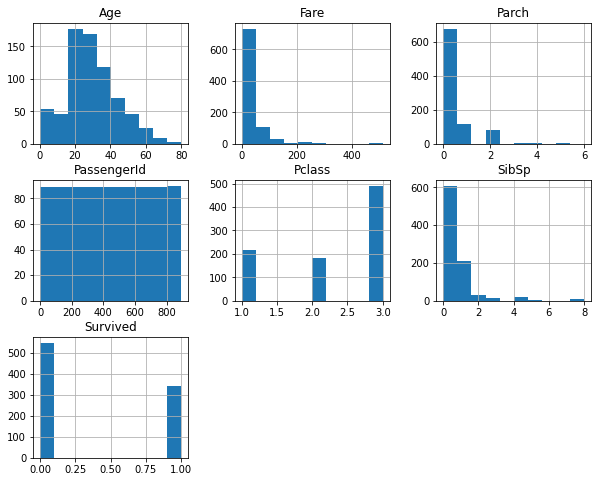

In [9]:
# ver histograma das variáveis numéricas
train.hist(figsize=(10,8));

**Quais grupos de pessoas tinham mais chances de sobrevivência??**

Análise da probabilidade de sobrevivência pelo sexo do indivíduo. Lembremos do lema, que talvez não usem muito nos dias de hoje, mulheres e crianças primeiro.

In [10]:
# Analisar a probabilidade de sobrevivência pelo Sexo
train[['Sex', 'Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


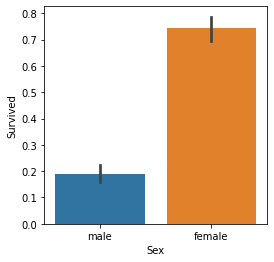

In [11]:
fig, (axis1) = plt.subplots(1,1, figsize=(4,4))
sns.barplot(x='Sex', y='Survived', data=train, ax=axis1);

Vamos ver como ficou a distribuição de sobreviventes por idade.

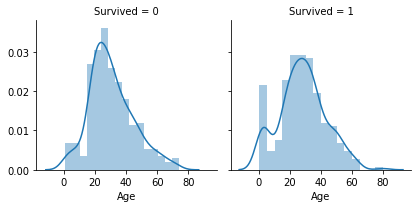

In [12]:
g = sns.FacetGrid(train, col='Survived')
g = g.map(sns.distplot, "Age")

Notamos que as distribuições de idade não são as mesmas nas subpopulações sobreviventes e não sobreviventes. Há um pico correspondente a passageiros jovens, que sobreviveram. Talvez eles se enquadrem em uma análise que faremos mais a frente sobre estar sozinho ou não. Também vemos que os passageiros entre 60-80 sobreviveram menos. Logo, mesmo que ```Age``` não esteja correlacionada com ```Survived``` podemos ver que há categorias de idade de passageiros que têm mais ou menos chance de sobreviver.

Vamos analisar também a classe e o porto onde a pessoa embarcou relacionado com o sexo.

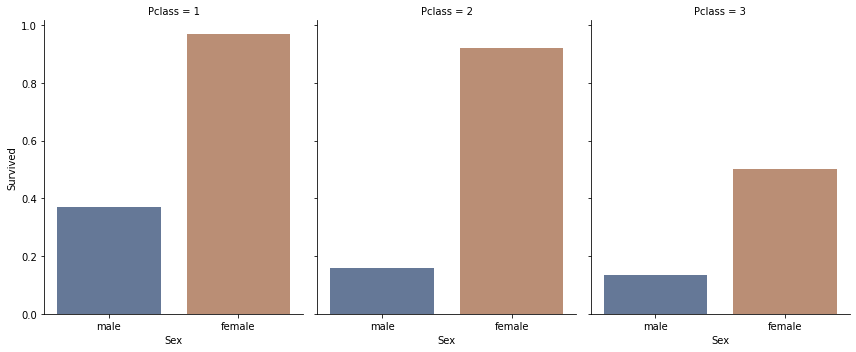

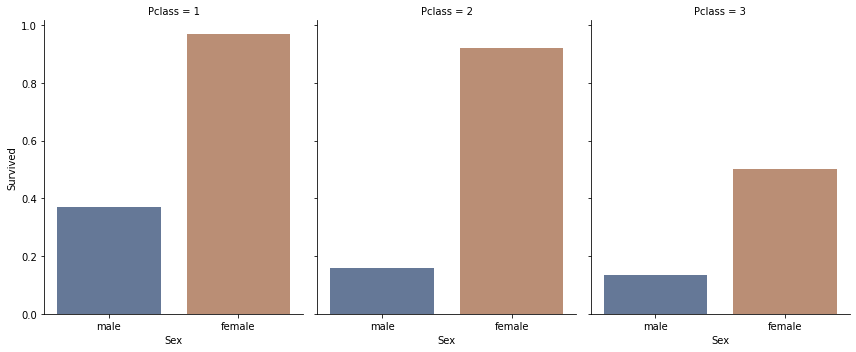

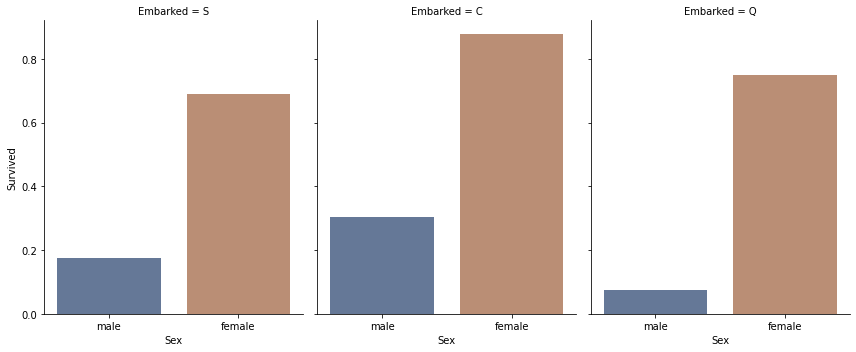

In [13]:
sns.catplot(x="Sex", y="Survived", col="Pclass", data=train, saturation=.5, kind="bar", ci=None, aspect=0.8, palette='deep');
sns.catplot(x="Sex", y="Survived", col="Pclass", data=train, saturation=.5, kind="bar", ci=None, aspect=0.8, palette='deep');
sns.catplot(x="Sex", y="Survived", col="Embarked", data=train, saturation=.5, kind="bar", ci=None, aspect=0.8, palette='deep');

Inferência usando os gráficos acima:

* ```Sex```: Existem mais chances de uma pessoa sobreviver se for do sexo feminino.
* ```Pclass```: Passageiros com classe de passageiros (Pclass) 1 têm maiores chances de sobreviver do que o restante.
* ```Embarked```: Passageiros que embarcaram em Cherbourg (C) sobreviveram mais do que aqueles que embarcaram em Queenstown (Q) ou Southampton (S).

Outra análise interessante de fazermos é se a pessoa viaja sozinha, ou em família ou grupos.

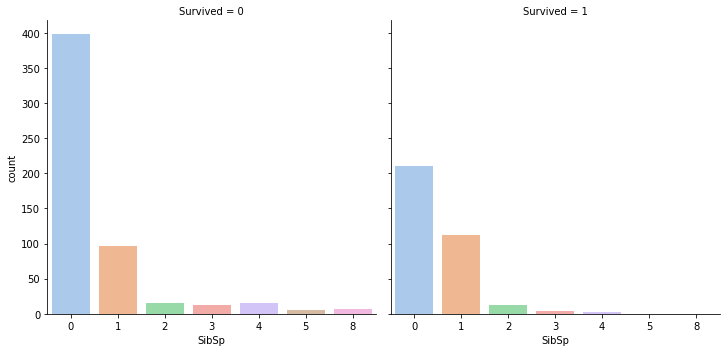

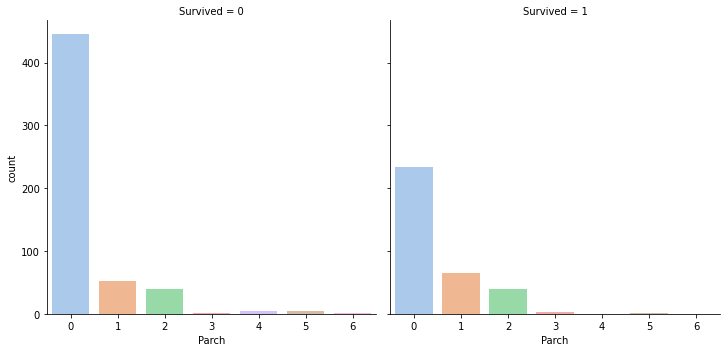

In [14]:
sns.catplot(x="SibSp", col = 'Survived', data=train, kind = 'count', palette='pastel');
sns.catplot(x="Parch", col = 'Survived', data=train, kind = 'count', palette='pastel');

Vamos acrescentar ao nosso dataset a variável ```Is_alone``` para marcar as pessoas acompanhadas ou não.

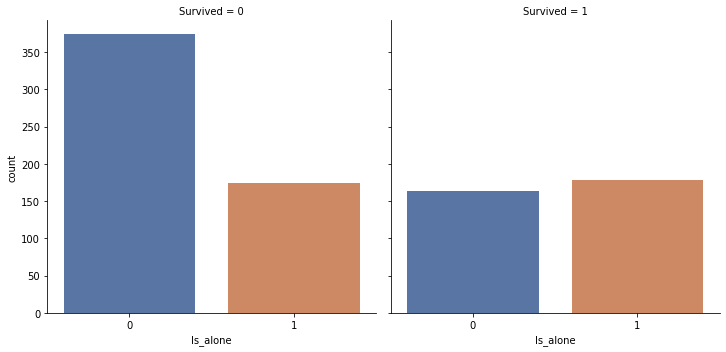

In [15]:
def is_alone(x):
    if  (x['SibSp'] + x['Parch'])  > 0:
        return 1
    else:
        return 0

train['Is_alone'] = train.apply(is_alone, axis = 1)
test['Is_alone'] = test.apply(is_alone, axis = 1)

g = sns.catplot(x="Is_alone", col = 'Survived', data=train, kind = 'count', palette='deep')

Percebemos que as pessoas que viajavam acompanhadas tinham maiores chances de sobreviver.

Vamos ver também o poder aquisitivo do passageiro pelo valor da passagem.

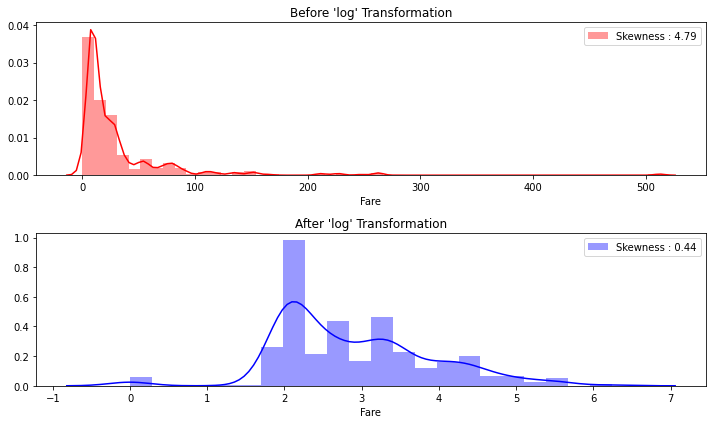

In [16]:
f, axes = plt.subplots(2, 1, figsize = (10, 6))

g1 = sns.distplot(train["Fare"], color="red", label="Skewness : %.2f"%(train["Fare"].skew()), ax=axes[0])
axes[0].title.set_text('Before \'log\' Transformation')
axes[0].legend()

train_fare = train["Fare"].map(lambda i: np.log(i) if i > 0 else 0)

g2 = sns.distplot(train_fare, color="blue", label="Skewness : %.2f"%(train_fare.skew()), ax=axes[1])
axes[1].title.set_text('After \'log\' Transformation')
axes[1].legend()

plt.tight_layout()

Como podemos ver, a distribuição de valores das tarifas é muito distorcida. Isso pode levar a valores muito altos, ou excesso de peso no modelo, mesmo se ele for dimensionado.

Nesse caso, é melhor transformá-lo com a função log para reduzir essa distorção.

Como podemos ver, a assimetria é claramente reduzida após a transformação logarítmica.

### Preparação dos Dados

Tirando o caso da análise da variável ```Is_alone```, até o momento somente analisamos os dados existentes. A partir disto temos que fazer uma limpeza e adequação nos dados para caber em nosso modelo de estudo.

Uma das modificação que faremos em nossos dados será pegar a informação da variável ```Cabin``` e aplicar um filtro, colocando o resultado na variável ```Cabine```, da seguinte maneira:
1. Valores em branco trocamos por 'X'
2. O restante dos valores pegamos a primeira letra de ```Cabin```

In [17]:
#train[]
def w_cabine(x):
    a = x['Cabin']
    if pd.isna(a):
        return "X"
    else:
        return a[:1]

train['Cabine'] = train.apply(w_cabine, axis = 1)
test['Cabine'] = test.apply(w_cabine, axis = 1)

In [18]:
colunas  = ['Cabin','Cabine']
train[colunas]

,Cabin,Cabine
0,NaN,X
1,C85,C
2,NaN,X
3,C123,C
4,NaN,X
...,...,...
886,NaN,X
887,B42,B
888,NaN,X
889,C148,C


Heatmap das variáveis numéricas após a preparação dos dados.

In [19]:
numerical = ['Pclass','Age','Is_alone','Fare']
categorical = ['Sex','Ticket','Cabin','Embarked','Cabine']
features = numerical + categorical
target = ['Survived']
print('Features:', features, '\nTarget:', target)

Features: ['Pclass', 'Age', 'Is_alone', 'Fare', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Cabine'] 
Target: ['Survived']


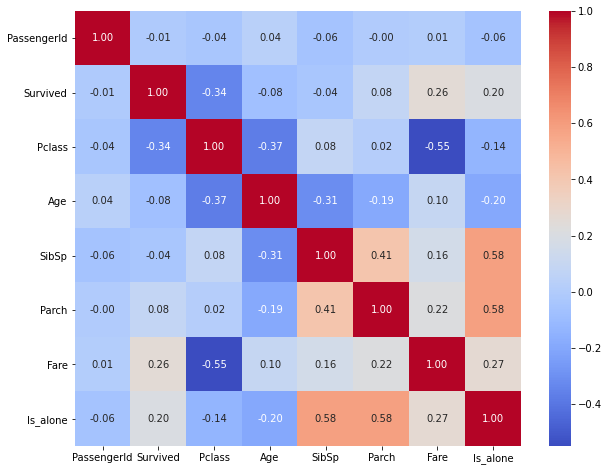

In [20]:
plt.figure(figsize=(10,8))
correlation_map = sns.heatmap(train.corr(), annot=True, fmt = ".2f", cmap = "coolwarm")
plt.show()

In [21]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

numerical_transformer = Pipeline(steps=[ ('iterative', IterativeImputer(max_iter = 10, random_state=0)), 
                                                                    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical),
        ('cat', categorical_transformer, categorical)])

Para a limpeza e organização dos dados faremos uso da biblioteca [scikit-learn](https://scikit-learn.org/stable/index.html) do Python. No caso usaremos uma combinação de [ColumnTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html) com [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) para realizar a transformação necessária em nossos dados.

Transformações usadas:

|Data type|Transformer|
|:---|:---|
|Numerical|[IterativeImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html) & [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)|
|Categorical|[SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html) & [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)|

Usaremos a estratégia **most_frequent** para as colunas categorical.

Após os tópicos de exploração e preparação dos dados, quem está começando, deve perceber que é tudo muito fácil, porém estas são as fases que mais tomam tempo do profissional de <i>Data Science</i>.

Tente entender as correlações mostradas. Qual a relação do sexo do passageiro e sua chance de sobreviver? O passageiro que viajou sozinho tem mais ou menos chances de sobreviver do que aquele que viajou em grupo?

As questões devem ser levantas e analisadas. Aqui vocês verão os melhores pontos que levantei. Os que deram "errado" resolvi tirar da análise.

### Construção do Modelo e Avaliação de Desempenho

In [22]:
from sklearn.model_selection import train_test_split
train_set, valid_set = train_test_split(train, test_size = 0.3, random_state = 0)

Usaremos duas abordagens:

1. Ensembling.
2. Random Forest Classifier (usado para enviar pro Kaggle).

**1.1-** Ensembling

Os métodos <i><a href="https://scikit-learn.org/stable/modules/ensemble.html">Ensemble</a></i> do **scikit-learn** são técnicas que criam múltiplos modelos e os combinam para aprimorar o resultado. Os modelos usados são chamados de <i>‘base models’</i>.

Faremos o uso do <i>Ensemble</i> com o <i><a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html">Voting Ensemble</a></i>. O <i>Voting</i> é uma das maneiras mais simples de combinar as previsões de vários algoritmos de aprendizado de máquina. Ele funciona criando primeiro dois ou mais modelos autônomos do conjunto de dados de treinamento. Um <i>Voting Classifier</i> pode ser usado para agrupar seus modelos e calcular a média das previsões dos submodelos quando solicitado a fazer previsões para novos dados.

Estaremos usando <i>Voting Classifier</i> com pesos. Iremos atribuir os pesos aos classificadores de acordo com suas precisões. Com isso, o classificador com precisão única receberá o peso mais alto e assim por diante.

Antes de passar diretamente para o uso do <i>Voting Classifier</i>, vamos dar uma olhada em como os algoritmos de classificação mencionados acima funcionam individualmente.


In [23]:
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import xgboost as xgb
from sklearn import metrics

accuracy = []
classifiers = ['Linear SVM', 'Radial SVM', 'LogisticRegression', 'RandomForestClassifier', 'AdaBoostClassifier', 'XGBoostClassifier']
models = [ svm.SVC(kernel='linear'), 
                  svm.SVC(kernel='rbf'), 
                 LogisticRegression(), 
                 RandomForestClassifier(n_estimators=200, random_state=0),
                 AdaBoostClassifier(random_state = 0),
                 xgb.XGBClassifier(n_estimators=100)
                 ]
for i in models:
    model = i
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', model)
                     ])
    pipe.fit(train_set[features], np.ravel(train_set[target]))
    prediction = pipe.predict(valid_set[features])
    accuracy.append(pipe.score(valid_set[features], valid_set[target]))

observations = pd.DataFrame(accuracy, index=classifiers, columns=['Score'])
observations.sort_values(by = 'Score', ascending = False)

,Score
RandomForestClassifier,0.847015
XGBoostClassifier,0.839552
Linear SVM,0.832090
AdaBoostClassifier,0.824627
Radial SVM,0.820896
LogisticRegression,0.820896


**1.2-**<i>Voting Classifier - Ensemble</i>

Selecionaremos os três melhores modelos, baseado em sua pontuação.

In [24]:
from sklearn.ensemble import VotingClassifier

rand = RandomForestClassifier(n_estimators=200, random_state=0)
pipe_rand = Pipeline(steps=[('preprocessor', preprocessor),  ('model', rand)])

xgb = xgb.XGBClassifier(n_estimators=100)
pipe_xgb = Pipeline(steps=[('preprocessor', preprocessor),  ('model', xgb)])

linear_svm = svm.SVC(kernel='linear', C=0.1,gamma=10, probability=True)
pipe_linear = Pipeline(steps=[('preprocessor', preprocessor),  ('model', linear_svm)])





ensemble_all = VotingClassifier(estimators=[('Random Forest Classifier', pipe_rand),
                                                                         ('Linear_svm', pipe_linear),
                                                                        ('XGB', pipe_xgb)], 
                                                                        voting='soft', weights=[3,2,1])

ensemble_all.fit(train_set[features], np.ravel(train_set[target]))
pred_valid = ensemble_all.predict(valid_set[features])

<b>Avaliação</b> dos modelos com três classificadores.

In [25]:
from sklearn.metrics import confusion_matrix, classification_report

acc_train = round(ensemble_all.score(train_set[features], train_set[target]) * 100, 2)
acc_valid = round(ensemble_all.score(valid_set[features], valid_set[target]) * 100, 2)
print("Train set Accuracy: ", acc_train, "%\nValidation set Accuracy: ", acc_valid, "%")

print("\nConfusion Matrix:\n", confusion_matrix(valid_set[target], pred_valid))
print("\nClassification Report:\n", classification_report(valid_set[target], pred_valid))

Train set Accuracy:  96.95 %
Validation set Accuracy:  85.45 %

Confusion Matrix:
 [[152  16]
 [ 23  77]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.90      0.89       168
           1       0.83      0.77      0.80       100

    accuracy                           0.85       268
   macro avg       0.85      0.84      0.84       268
weighted avg       0.85      0.85      0.85       268



**2-** Classificador Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=200, random_state = 0)

pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', model)
                     ])

pipe.fit(train_set[features], np.ravel(train_set[target]))

pred_valid = pipe.predict(valid_set[features])

**Avaliação** do modelo com o melhor classificador.

In [27]:
from sklearn.metrics import confusion_matrix, classification_report

acc_ran_train = round(pipe.score(train_set[features], train_set[target]) * 100, 2)
acc_ran_valid = round(pipe.score(valid_set[features], valid_set[target]) * 100, 2)
print("Train set Accuracy: ", acc_ran_train, "%\nValidation set Accuracy: ", acc_ran_valid, "%")

print("\nConfusion Matrix:\n", confusion_matrix(valid_set[target], pred_valid))
print("\nClassification Report:\n", classification_report(valid_set[target], pred_valid))

Train set Accuracy:  99.84 %
Validation set Accuracy:  84.7 %

Confusion Matrix:
 [[151  17]
 [ 24  76]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88       168
           1       0.82      0.76      0.79       100

    accuracy                           0.85       268
   macro avg       0.84      0.83      0.83       268
weighted avg       0.85      0.85      0.85       268



### Resultado

Enviamos ao Keggle o dataset com a previsão do nosso modelo e o resultado foi 81,1% de acerto.

In [28]:
pred_test = pipe.predict(test[features])
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': pred_test})
output.to_csv('submission.csv', index=False)

<img src="kaggle.png">

## Conclusões

Fizemos uso de algumas ferramentas do Python para ajudar, primeiro na análise (Pandas e matplotlib) e por último na criação e avaliação do modelo (scikit-learn). Optei por ocultar o código Python, porém estarão disponíveis para quem quiser no link do meu [GitHub](https://github.com/edugouget/DataSciencePortfolio/tree/master/01%20Titanic). 

Essa análise não está 100% completa, quero dizer com isso que há muito espaço para aprimoramento na análise e uso dos modelos. Podendo trazer uma acurácia muito maior.